# Housing-Price-Detection-Project

In [2]:
# Loading libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows",1200) 

In [4]:
# loading dataset
train_data=pd.read_csv("housing_train.csv")
test_data=pd.read_csv("housing_test.csv")

In [5]:
# Checking information of dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
test_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [9]:
# checking shape of train data
train_data.shape

(1168, 81)

In [10]:
# checking shape of test data
test_data.shape

(292, 80)

In [11]:
# Checking null counts
nulls = pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1161
MiscFeature,1124
Alley,1091
Fence,931
FireplaceQu,551
LotFrontage,214
GarageType,64
GarageCond,64
GarageYrBlt,64


In [12]:
# checking correlation 
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006629,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,0.005269,-0.019494,-0.013812,0.009647,-0.029671,-0.070180,-0.024325,0.023027,-0.043572,-0.015187,-0.028512,0.009376,0.001216,-0.001613,-0.024175,-0.000469,0.007549,0.010048,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,0.077630,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006629,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,0.002514,0.123943,0.386261,0.448186,0.099250,0.007885,0.410414,0.104255,0.001528,0.189321,0.053168,0.264010,-0.002890,0.351969,0.262076,0.061101,0.276798,0.344908,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.029212,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.034981,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.541719,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.318278,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.826366,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.639153,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060652,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,-0.065723,0.109850,0.366833,0.339938,0.173358,-0.070518,0.387891,0.086720,0.014198,0.268545,0.200926,0.091717,-0.038281,0.279391,0.243812,0.254547,0.342553,0.365849,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,0.003868,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.135558,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.

Observation: Here Id, MSSubClass, OverallCond, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, YrSold                  these features are negatively correlated with target variable. So, we can remove some of columns from dataset.

In [13]:
# statistical description
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Observation: MSSubClass	 maximum 1168 and minimum 20
             LotFrontage maximum 954 and minimum 21
             LotArea maximum 1168 and minimum 1300
             OverallQual maximum 1168 and minimum 1
             OverallCond maximum 1168 and minimum 1
             YearBuilt maximum 1168 and minimum 1875
             YearRemodAdd maximum 1168 and minimum 1950
             MasVnrArea maximum 1161 and minimum 0
             BsmtFinSF1 maximum 1161 and minimum 0
             BsmtFinSF maximum 1168 and minimum 0...ect.
Outliers present in dataset. We can handle it later             

# Univariate Analysis

140000    18
135000    16
155000    12
139000    11
160000    11
145000    10
110000     9
190000     9
130000     9
147000     8
215000     8
185000     8
115000     8
127000     8
125000     8
129000     8
235000     7
175000     7
141000     7
165000     7
128000     7
144000     7
230000     7
176000     7
200000     7
100000     7
180000     7
148000     6
108000     6
173000     6
174000     6
205000     6
170000     6
132500     6
151000     5
133000     5
250000     5
152000     5
172500     5
124000     5
187500     5
143000     5
158000     5
290000     5
225000     5
181000     5
239000     5
240000     5
136500     5
137000     5
120000     5
260000     5
157000     5
178000     5
113000     4
119000     4
168000     4
189000     4
132000     4
191000     4
118500     4
163000     4
275000     4
124500     4
120500     4
149900     4
150000     4
184000     4
207500     4
192000     4
112000     4
123000     4
137500     4
325000     4
127500     4
171000     4
214000     4

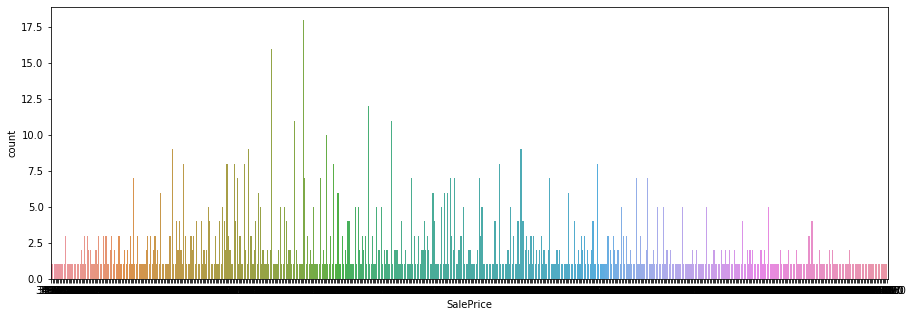

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))                  # Checking count for OverallQual--average ang above average has maximum count
sns.countplot(x='SalePrice',data=train_data)
print(train_data['SalePrice'].value_counts())

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


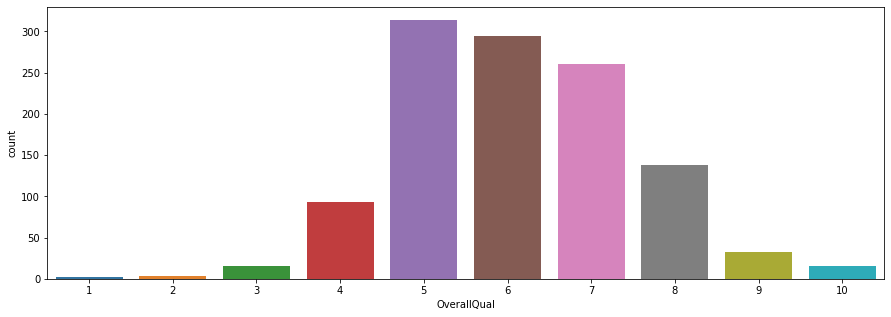

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))                  # Checking count for OverallQual--average ang above average has maximum count
sns.countplot(x='OverallQual',data=train_data)
print(train_data['OverallQual'].value_counts())

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
72.0      13
51.0      13
55.0      13
100.0     12
82.0      12
59.0      12
63.0      11
74.0      11
71.0      11
53.0      10
66.0      10
69.0      10
88.0      10
34.0       9
67.0       9
84.0       9
52.0       8
40.0       8
43.0       8
76.0       8
92.0       8
77.0       8
62.0       7
57.0       7
61.0       7
86.0       7
35.0       7
95.0       7
44.0       6
81.0       6
94.0       6
41.0       6
54.0       6
96.0       6
98.0       6
120.0      6
87.0       5
30.0       5
58.0       5
36.0       5
107.0      5
89.0       5
105.0      5
93.0       5
91.0       4
49.0       4
32.0       3
130.0      3
110.0      3
103.0      3
48.0       3
108.0      3
99.0       3
37.0       3
104.0      3
47.0       3
56.0       3
83.0       3
121.0      2
122.0      2
134.0      2
174.0      2

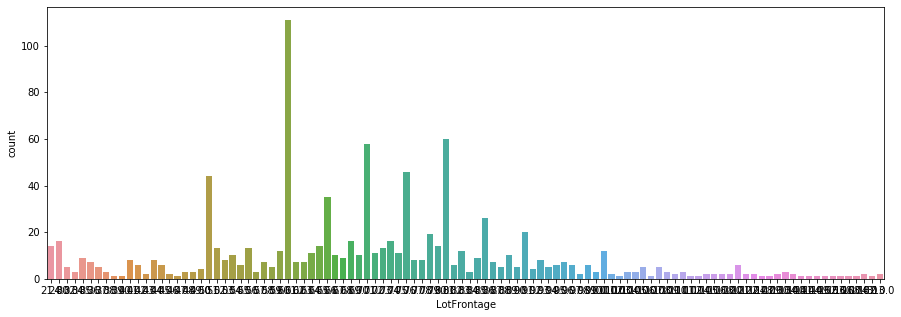

In [16]:
plt.figure(figsize=(15,5))                  # Checking count for LotFrontage --60 has maximum count
sns.countplot(x='LotFrontage',data=train_data)
print(train_data['LotFrontage'].value_counts())

2006    57
2005    51
2007    41
2004    37
2003    33
1977    25
1976    23
1920    22
1959    21
1971    20
1965    20
1954    20
2002    20
1998    20
1972    18
1962    18
1999    18
1957    18
1970    18
2001    18
2008    18
1958    17
1940    17
1993    16
1910    16
1966    15
1968    15
1995    15
2000    15
1960    15
2009    14
1950    14
1961    14
1956    13
1963    13
1925    13
1969    13
1955    13
1978    13
1994    13
1997    12
1967    12
1996    12
1949    12
1948    12
1964    11
1941    11
1953    10
1990    10
1988     9
1992     9
1936     9
1974     8
1915     8
1973     8
1900     8
1980     8
1916     7
1918     7
1979     7
1924     6
1923     6
1922     6
1921     6
1926     6
1946     6
1914     6
1951     6
1975     6
1928     5
1984     5
1986     5
1991     5
1937     5
1982     5
1935     5
1981     5
1930     5
1880     4
1929     4
1939     4
1952     4
1931     4
1983     4
1945     4
1985     4
1932     3
1934     3
1947     3
1912     3
1938     2

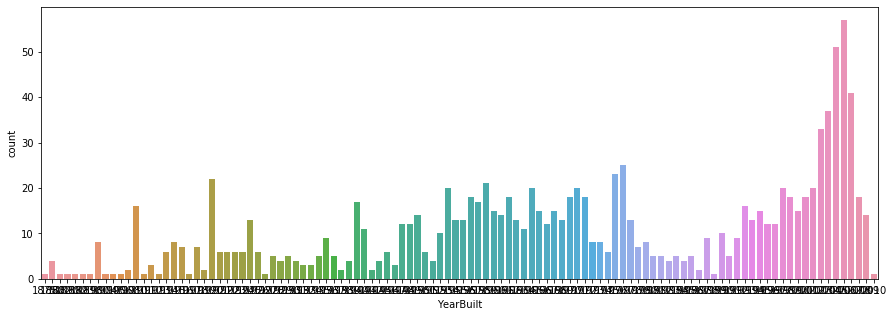

In [17]:
plt.figure(figsize=(15,5))                  # Checking count for YearBuilt--2006 has maximum count--57
sns.countplot(x='YearBuilt',data=train_data)
print(train_data['YearBuilt'].value_counts())

864     19
1040    13
912     12
894     10
848      9
672      8
816      8
960      6
936      6
832      6
764      5
1236     5
768      5
1080     5
780      5
1144     5
1728     5
728      5
720      5
882      5
483      5
630      5
798      5
1442     4
1392     4
952      4
948      4
892      4
804      4
1328     4
958      4
900      4
1188     4
902      4
810      4
1120     4
1200     4
1026     4
1164     4
1422     4
1306     4
1092     4
796      4
1050     4
520      4
1337     4
1494     4
616      4
1072     4
774      4
1056     4
1128     3
1086     3
1088     3
954      3
1414     3
1095     3
1097     3
970      3
1500     3
1098     3
928      3
1478     3
983      3
976      3
1006     3
1052     3
1053     3
1148     3
1152     3
1008     3
1136     3
1005     3
1166     3
1134     3
1535     3
1057     3
1440     3
988      3
1032     3
999      3
904      3
916      3
866      3
855      3
847      3
1220     3
1252     3
1258     3
1370     3
1800     3

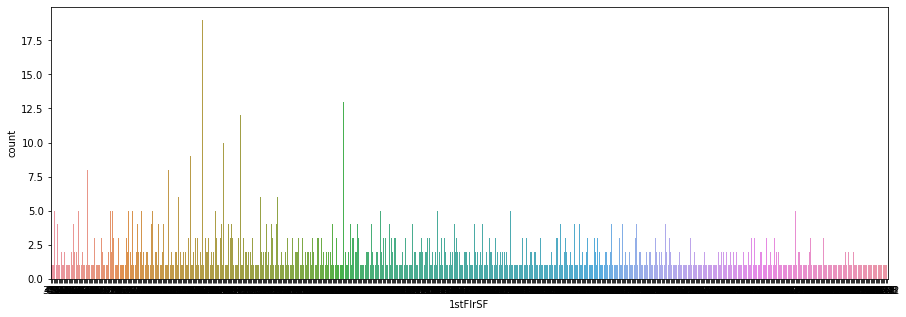

In [18]:
plt.figure(figsize=(15,5))                  # Checking count of 1stFlrSF 
sns.countplot(x='1stFlrSF',data=train_data)
print(train_data['1stFlrSF'].value_counts())

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


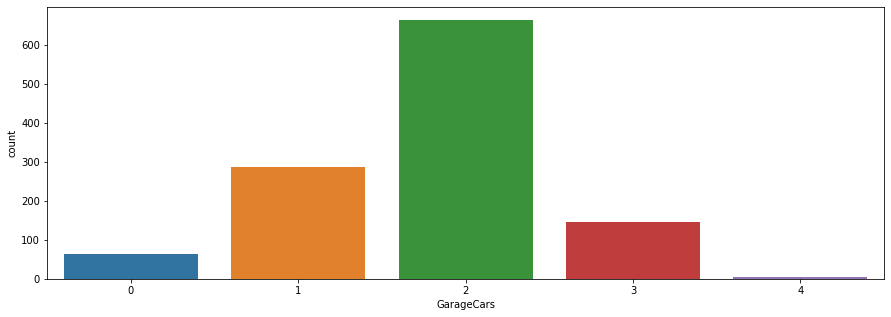

In [19]:
plt.figure(figsize=(15,5))                  # Checking count of GarageCars --2nd type has more count 665
sns.countplot(x='GarageCars',data=train_data)
print(train_data['GarageCars'].value_counts())

864     16
1040    11
894     10
1456     9
1200     8
848      7
816      7
912      7
1728     6
1092     6
1252     5
1768     5
1344     5
1494     5
987      5
1144     5
1484     5
1224     4
960      4
1800     4
1218     4
630      4
1337     4
1056     4
1442     4
1632     4
1502     4
1694     4
1382     4
1250     4
1710     4
1479     4
1656     4
1652     4
1795     3
1080     3
952      3
1363     3
1824     3
1576     3
2263     3
958      3
1236     3
1573     3
768      3
1786     3
1844     3
1839     3
1362     3
1258     3
1680     3
1324     3
1668     3
1316     3
1314     3
1328     3
1306     3
1302     3
1660     3
1294     3
1716     3
1717     3
1646     3
1640     3
1734     3
1620     3
1352     3
1626     3
999      3
1432     3
1118     3
1152     3
1928     3
1111     3
2097     3
1478     3
2090     3
1920     3
1414     3
858      3
1196     3
1412     3
882      3
900      3
1489     3
1470     3
1535     3
1959     3
1466     3
904      3
2020     3

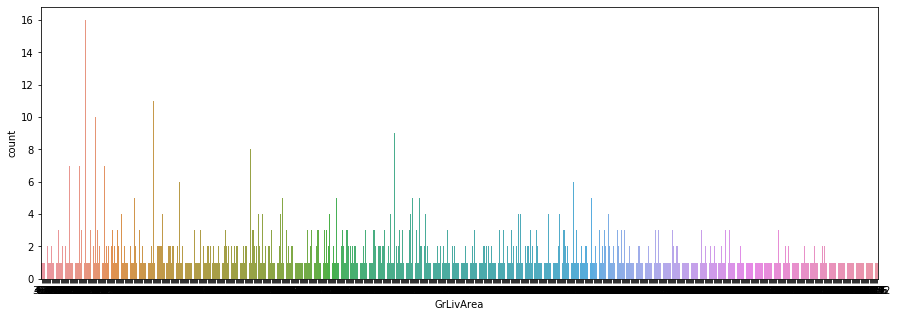

In [20]:
plt.figure(figsize=(15,5))                  # Checking count of GrLivArea 864 has maximum count of 16
sns.countplot(x='GrLivArea',data=train_data)
print(train_data['GrLivArea'].value_counts())

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


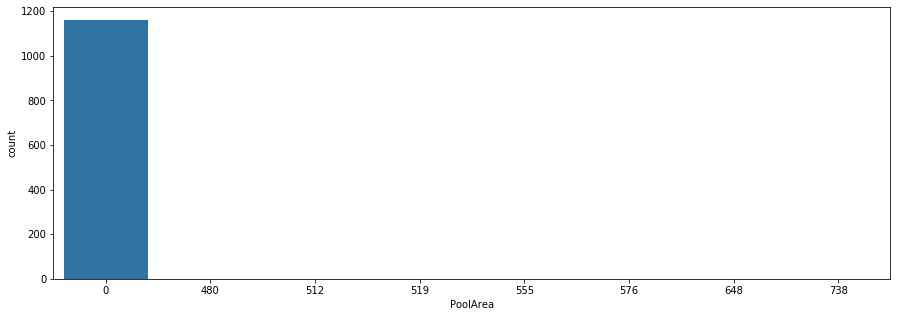

In [21]:
plt.figure(figsize=(15,5))                  # Checking count of PoolArea having maximum count 1161
sns.countplot(x='PoolArea',data=train_data)
print(train_data['PoolArea'].value_counts())

# Bivariate Analysis

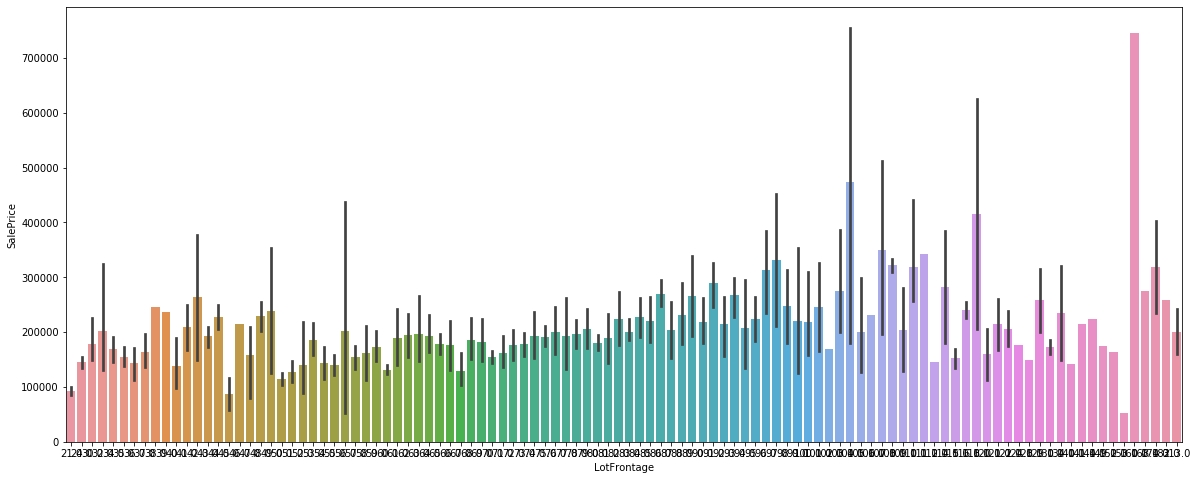

In [22]:
plt.figure(figsize=(20,8)) 
sns.barplot(x='LotFrontage',y='SalePrice',data=train_data)  # bar gragh of LotFrontage and SalePrice
plt.show()

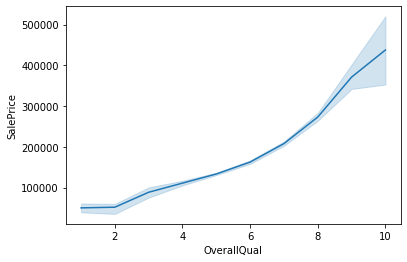

In [23]:
sns.lineplot(x='OverallQual',y='SalePrice',data=train_data)# lineplot of OverallQual and SalePrice. SalePrice increases 
plt.show()                                                              #when OverallQual inceases


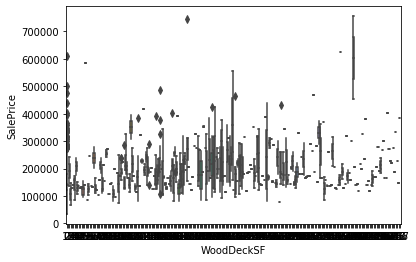

In [24]:
sns.boxplot(x='WoodDeckSF',y='SalePrice',data=train_data)   # WoodDeckSF has maximum price count is between 1 lakh to 3 lakh
plt.show()

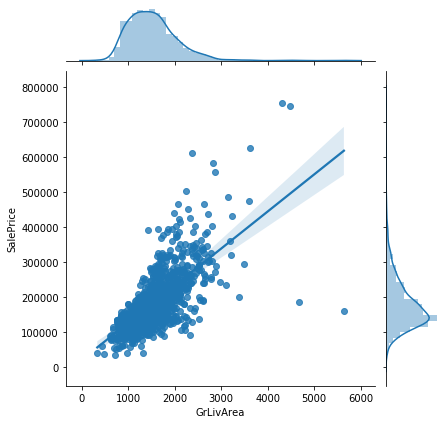

In [25]:
sns.jointplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], kind='reg')# As GrLivArea increases SalePrice also increases

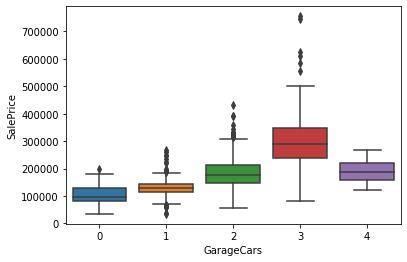

In [26]:
# Garage Area vs Sale Price
sns.boxplot(x=train_data['GarageCars'], y=train_data['SalePrice'])

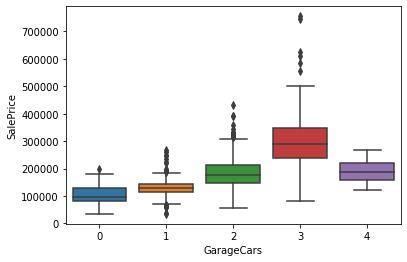

In [27]:
# GarageCars vs Sale Price
sns.boxplot(x=train_data['GarageCars'], y=train_data['SalePrice'])

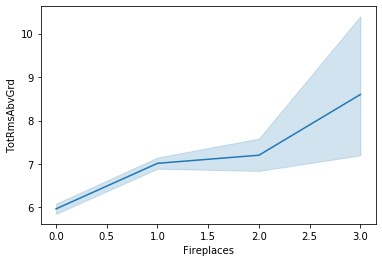

In [28]:
sns.lineplot(x='Fireplaces',y='TotRmsAbvGrd',data=train_data)  # TotRmsAbvGrd inceases Fireplaces also inceases
plt.show()

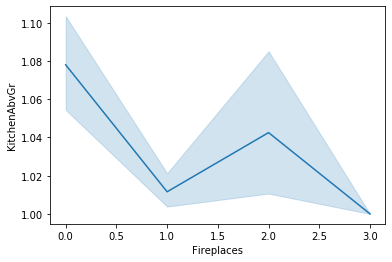

In [29]:
sns.lineplot(x='Fireplaces',y='KitchenAbvGr',data=train_data)
plt.show()

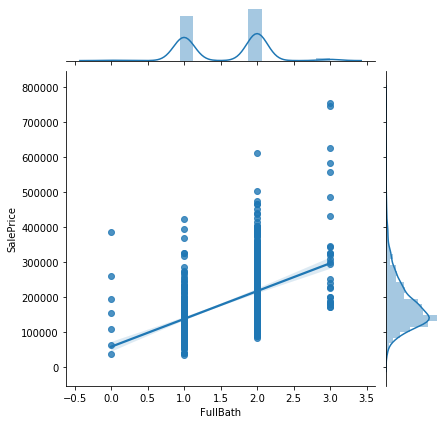

In [30]:
sns.jointplot(x=train_data['FullBath'], y=train_data['SalePrice'], kind='reg') # SalePrice increases when FullBath increases

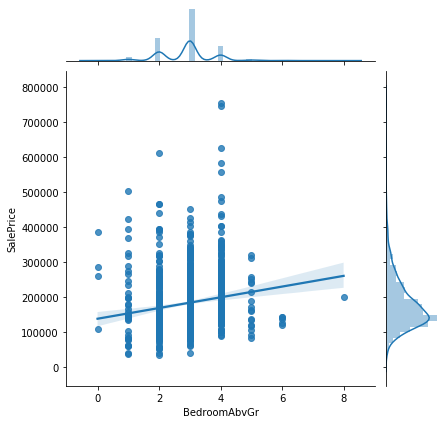

In [31]:
sns.jointplot(x=train_data['BedroomAbvGr'], y=train_data['SalePrice'], kind='reg')

In [32]:
# drooping unefficient columns
train_data = train_data.drop(train_data.columns[train_data.apply(lambda col: col.isnull().sum()/len(train_data) > 0.3)], axis=1)

In [33]:
#Checking shape 
train_data.shape

(1168, 76)

In [34]:
# checking catogorical features
categorical = train_data.dtypes[train_data.dtypes == object].index

print(categorical)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [35]:
# checking numerical features
numerical2 = train_data.dtypes[train_data.dtypes != object].index
print(numerical2)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [36]:
# checking value count of House style
train_data['HouseStyle'].value_counts()

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

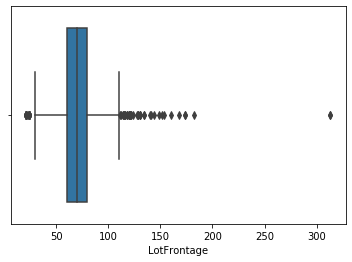

In [37]:
# checking outliers in LotFrontage
import seaborn as sns
sns.boxplot(x=train_data['LotFrontage'])

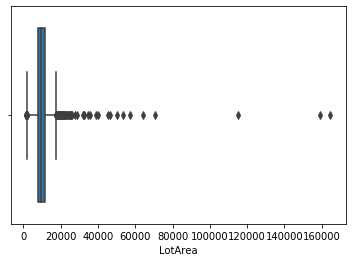

In [38]:
# checking outliers in LotArea
sns.boxplot(x=train_data['LotArea'])

In [39]:
# checking value count of MSZoning
train_data['MSZoning'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

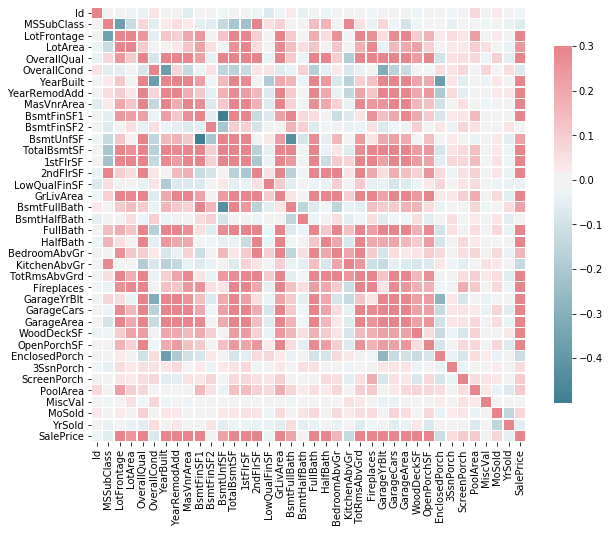

In [40]:
# Checking correlation
import matplotlib.pyplot as plt
corr = train_data.corr()
plt.figure(figsize = (10,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})

Text(0.5, 1.0, 'correlation with target variable')

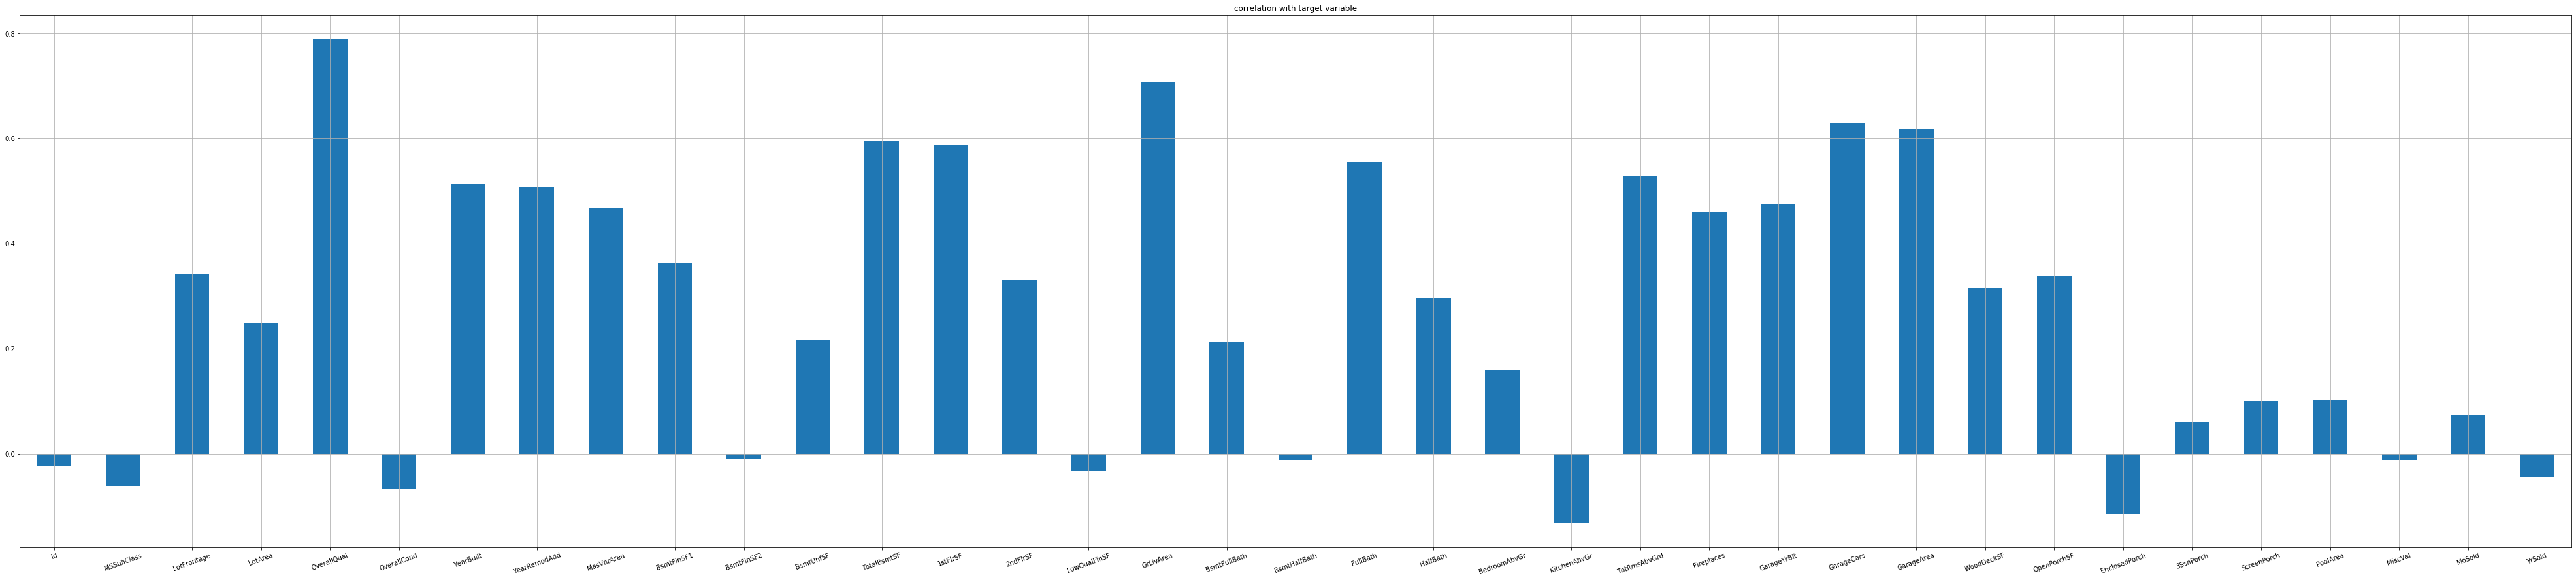

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(70,15))
train_data.drop('SalePrice',axis=1).corrwith(train_data['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

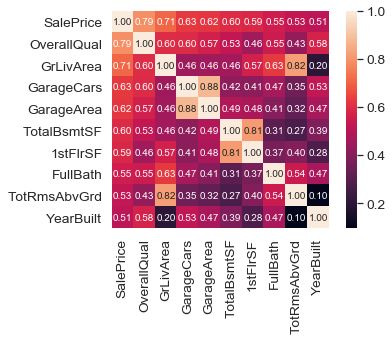

In [42]:
import numpy as np
import matplotlib.pyplot as plt
corrmat = train_data.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [43]:
# dropping LowQualFinSF, Id, BsmtFinType2, YrSold columns
train_data=train_data.drop(['LowQualFinSF','Id','BsmtFinType2','YrSold'],axis=1)

In [44]:
# Imputing null values 
train_data['BsmtQual']=train_data["BsmtQual"].fillna("TA")
train_data['BsmtCond']=train_data["BsmtCond"].fillna("TA")
train_data['GarageType']=train_data["GarageType"].fillna("Attchd")
train_data['GarageFinish']=train_data["GarageFinish"].fillna("Unf")
train_data['GarageQual']=train_data["GarageQual"].fillna("TA")
train_data['GarageCond']=train_data["GarageCond"].fillna("TA")
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())
train_data['MasVnrType']=train_data['MasVnrType'].fillna("None")

In [45]:
# encoding with get_dummies method
train_data1=pd.get_dummies(train_data,columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'])

In [46]:
train_data3=train_data[['MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
     'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice']]

In [47]:
train_data2=train_data[[ 'LotFrontage', 'GarageYrBlt']]

# Removing outliers

In [48]:
# handling outliers using quantile method
Q1 = train_data2.quantile(0.25)
Q3 = train_data2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LotFrontage    20.0
GarageYrBlt    41.0
dtype: float64


In [49]:
print(IQR.index)
for x in IQR.index:
    print(x,IQR[x])

Index(['LotFrontage', 'GarageYrBlt'], dtype='object')
LotFrontage 20.0
GarageYrBlt 41.0


In [50]:
print('Lower:',Q1 - 1.5 * IQR)
print('Upper:',Q3 + 1.5 * IQR)

Lower: LotFrontage      30.0
GarageYrBlt    1899.5
dtype: float64
Upper: LotFrontage     110.0
GarageYrBlt    2063.5
dtype: float64


In [51]:
train_data_set_Out = train_data2[~((train_data2 < (Q1 - 1.5 * IQR)) |
                                    (train_data2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
# checking information
train_data_set_Out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1167
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  882 non-null    float64
 1   GarageYrBlt  1038 non-null   float64
dtypes: float64(2)
memory usage: 25.7 KB


In [53]:
# checking null values in LotFrontage, GarageYrBlt
train_data_set_Out.apply(lambda x: sum(x.isnull()))

LotFrontage    214
GarageYrBlt     58
dtype: int64

In [54]:
# checking null values
train_data_set_Out["LotFrontage"] =train_data_set_Out["LotFrontage"].fillna(train_data_set_Out["LotFrontage"].median())
train_data_set_Out["GarageYrBlt"] =train_data_set_Out["GarageYrBlt"].fillna(train_data_set_Out["GarageYrBlt"].median())

In [55]:
# concatenating data
frames=[train_data_set_Out,train_data3]
train_new=pd.concat(frames,axis=1,sort=False)

In [56]:
# checking info
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1096 non-null   float64
 1   GarageYrBlt    1096 non-null   float64
 2   MSSubClass     1168 non-null   int64  
 3   LotArea        1168 non-null   int64  
 4   OverallQual    1168 non-null   int64  
 5   OverallCond    1168 non-null   int64  
 6   YearBuilt      1168 non-null   int64  
 7   YearRemodAdd   1168 non-null   int64  
 8   MasVnrArea     1168 non-null   float64
 9   BsmtFinSF1     1168 non-null   int64  
 10  BsmtFinSF2     1168 non-null   int64  
 11  BsmtUnfSF      1168 non-null   int64  
 12  TotalBsmtSF    1168 non-null   int64  
 13  1stFlrSF       1168 non-null   int64  
 14  2ndFlrSF       1168 non-null   int64  
 15  GrLivArea      1168 non-null   int64  
 16  BsmtFullBath   1168 non-null   int64  
 17  BsmtHalfBath   1168 non-null   int64  
 18  FullBath

In [57]:
# checking sum of null values
train_new.apply(lambda x:sum(x.isnull()))

LotFrontage      72
GarageYrBlt      72
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
SalePrice         0
dtype: int64

In [58]:
# cancatenating new data
frames1=[train_new,train_data1]
train_new1=pd.concat(frames,axis=1,sort=False)

In [59]:
train_new1.head()

,LotFrontage,GarageYrBlt,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,70.0,1977.0,120,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,958,0,0,2,0,2,1,5,1,2,440,0,205,0,0,0,0,0,2,128000
1,95.0,1970.0,20,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,2217,1,0,2,0,4,1,8,1,2,621,81,207,0,0,224,0,0,10,268000
2,92.0,1997.0,60,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,2013,1,0,2,1,3,1,8,1,2,455,180,130,0,0,0,0,0,6,269790
3,105.0,1977.0,20,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,1844,0,0,2,0,3,1,7,1,2,546,0,122,0,0,0,0,0,1,190000
4,70.0,1977.0,20,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,1602,0,1,2,0,3,1,8,1,2,529,240,0,0,0,0,0,0,6,215000


In [60]:
# checking null values
train_new1.apply(lambda x:sum(x.isnull()))

LotFrontage      72
GarageYrBlt      72
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
SalePrice         0
dtype: int64

In [61]:
# Imputing null values by median
train_new1["LotFrontage"] =train_new1["LotFrontage"].fillna(train_new1["LotFrontage"].median())
train_new1["GarageYrBlt"] =train_new1["GarageYrBlt"].fillna(train_new1["GarageYrBlt"].median())


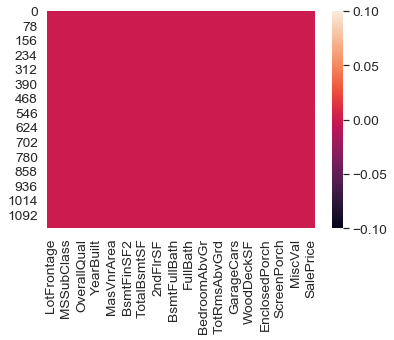

In [62]:
import seaborn as sns
sns.heatmap(train_new1.isnull())

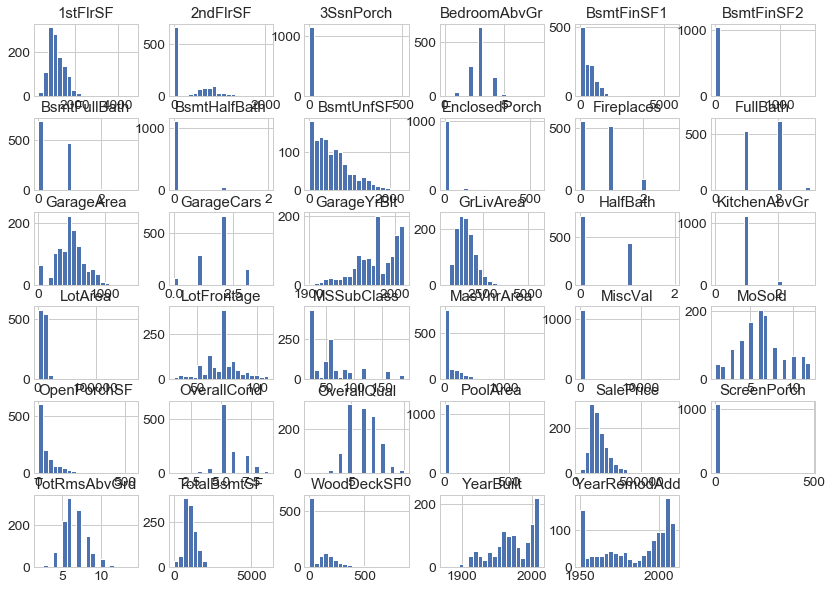

In [63]:
# plotting histogram of all coumns using hist
plt.style.use('seaborn-whitegrid')
train_new1.hist(bins=20, figsize=(14,10))
plt.show()

# Building Model

In [64]:
X_features=train_new1.drop('SalePrice',axis=1)
Y_target=train_new1['SalePrice']


In [65]:
from sklearn.preprocessing import StandardScaler   #scaling the data
sc=StandardScaler()
X_features=sc.fit_transform(X_features)
X_features

array([[ 0.03489357, -0.05161314,  1.50830058, ..., -0.07684505,
        -0.0871313 , -1.61782184],
       [ 1.78858097, -0.34857938, -0.87704243, ..., -0.07684505,
        -0.0871313 ,  1.3614701 ],
       [ 1.57813849,  0.79686184,  0.07709478, ..., -0.07684505,
        -0.0871313 , -0.12817587],
       ...,
       [ 0.03489357,  0.07565811,  2.46243779, ..., -0.07684505,
        -0.0871313 ,  0.24423562],
       [-1.36805634, -2.46976683,  0.31562908, ..., -0.07684505,
        -0.0871313 ,  0.24423562],
       [ 0.03489357,  1.00898059,  0.07709478, ..., -0.07684505,
        -0.0871313 , -0.12817587]])

In [66]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test =model_selection.train_test_split(X_features,Y_target,test_size = 0.2,random_state=42)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [68]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
knn=KNeighborsRegressor()

In [69]:
models = []
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('KNeighborsRegressor',knn))

In [70]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X_features,Y_target,random_state=r_state,test_size=0.22)


In [71]:
import numpy as np

In [72]:
Model = []
score = []

for name,model in models:
    print("**********",name,'**************')
    print('\n')
    x_train,x_test,y_train,y_test=train_test_split(X_features,Y_target,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(X_train,Y_train)
    print(model)
    pre=model.predict(X_test)
    r2_scr=r2_score(Y_test,pre)
    print("r2_score corresponding to random state is" ,r2_scr*100)
    print("Absolute error is", np.abs(mean_squared_error(Y_test,pre)))   
    print('\n')
    print("RMSE is", np.sqrt(mean_squared_error(Y_test,pre)))

********** LinearRegression **************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
r2_score corresponding to random state is 69.11636738537209
Absolute error is 2154755168.8664527


RMSE is 46419.34046134706
********** DecisionTreeRegressor **************


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
r2_score corresponding to random state is 54.90714555687959
Absolute error is 3146134472.025641


RMSE is 56090.4133700728
********** RandomForestRegressor **************


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto

# Regularization techniques

In [73]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1,solver='cholesky')

ridge_reg.fit(X_train,Y_train)
my_prediction_ridge=ridge_reg.predict(X_train)
my_prediction_ridge_test=ridge_reg.predict(X_test)
r2_score(Y_test,my_prediction_ridge_test)

0.691469662241577

In [74]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.2)

lasso_reg.fit(X_train,Y_train)
my_prediction_lasso=lasso_reg.predict(X_train)
my_prediction_lasso_test=lasso_reg.predict(X_test)
r2_score(Y_test,my_prediction_lasso_test)

0.6911685865475936

In [75]:
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)

en_reg.fit(X_train,Y_train)
my_prediction_en=en_reg.predict(X_train)
my_prediction_en_test=en_reg.predict(X_test)
r2_score(Y_test,my_prediction_en_test)

0.7002202823053741

In [76]:
from xgboost import XGBRegressor

In [77]:
xgb = XGBRegressor(n_jobs=4)
xgb.fit(X_train, Y_train, verbose=True)
xgb_pre=xgb.predict(X_test)
r2_scr=r2_score(Y_test,xgb_pre)
print("r2 score",r2_scr*100)


r2 score 78.5729364278487


In [78]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,Y_train)
gb_pred=gb.predict(X_test)
r2_scr=r2_score(Y_test,gb_pred)
print("r2 score",r2_scr*100)


r2 score 77.4270010548551


In [79]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model = xgb.XGBRegressor()
model.fit(X_train,Y_train)
my_prediction=model.predict(X_train)
r2_scr=r2_score(Y_train,my_prediction)
print("r2 score",r2_scr*100)


r2 score 99.98953480182645


In [80]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model = xgb.XGBRegressor()
model.fit(X_train,Y_train)
my_prediction=model.predict(X_test)
r2_scr=r2_score(Y_test,my_prediction)
print("r2 score",r2_scr*100)

r2 score 78.5729364278487


# Cross validation

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
list=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),xgb.XGBRegressor(),GradientBoostingRegressor()]
for i in list:
    print("Mean r2 score for",i, "regression",cross_val_score(i,X_train,Y_train,cv=5,scoring="r2").mean())
    print("Standard Deviation for", i, "regression",cross_val_score(i,X_train,Y_train,cv=5,scoring="r2").std())

Mean r2 score for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) regression 0.6673275268710765
Standard Deviation for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) regression 0.2114962867924832
Mean r2 score for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') regression 0.7120010808833858
Standard Deviation for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2

GradientBoostingRegressor giving better accuracy of 86%

In [83]:
from sklearn.externals import joblib    # Saving Model
joblib.dump(gb,'gbhouse_price_detection.obj')

['gbhouse_price_detection.obj']

In [84]:
# Conclusion:- OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF,  1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt  
#are most effective attributes in predicting the house price and  the GradientBoosting Regressor is themost effective model
#for our Dataset with 86% of accuracy.

In [85]:
DF = pd.DataFrame(gb_pred)

In [86]:
DF.to_csv("House_P.csv")